## Precip and humidity response in canCESM
1. Maps of historical and SSP 585 precip
2. Time series of precipitation

In [17]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import glob
import csv
import pandas

In [18]:
#import proplot 
import os
os.sys.path

['',
 '/home/disk/p/akshu/Akshaya/DF_class_RF_assignment',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/disk/p/akshu/.ipython']

In [19]:
root_path = '/home/disk/eos9/cmip6'
experiment = 'historical'
experiment2 = 'ssp585'

In [20]:
root_path = '/home/disk/eos9/cmip6'
experiment = 'historical'
experiment2 = 'ssp585'
model_list = ['CanESM5']
              
variable = 'tas'
MIP_table = 'Amon'

# specific grid label for each model 
grid_label = {'CanESM5': 'gn'}

variant =   {'CanESM5': 'r1i1p1f1' }

# check grid labels are defined for all models
assert all(x in grid_label for x in model_list) ##assert statement to debug the code!


In [21]:
data = {} # initialize empty dictionary to store all data
data2 = {}

for model in model_list:
    file_path = os.path.join(root_path, experiment, model, variable)
    file_path2 = os.path.join(root_path, experiment2, model, variable)
    filenames = '%s_%s_%s_%s_%s_%s_*.nc' % (
                    variable,
                    MIP_table,
                    model,
                    experiment,
                    variant[model],
                    grid_label[model],
            )  # note '*' in place of date range specification
    filenames2 = '%s_%s_%s_%s_%s_%s_*.nc' % (
                    variable,
                    MIP_table,
                    model,
                    experiment2,
                    variant[model],
                    grid_label[model],
            )  # note '*' in place of date range specification

    filenames_list = glob.glob(os.path.join(file_path, filenames))
    filenames_list2 = glob.glob(os.path.join(file_path2, filenames2))

    
    # open data for particular model and store in dictionary
    try:
        data[model] = xr.open_mfdataset(filenames_list, use_cftime=True)
        data2[model] = xr.open_mfdataset(filenames_list2, use_cftime=True)   
    except IOError:
        print("Warning, no files found for %s, %s" % (experiment2, model))
        data[model] = []
        data2[model] = []

print(file_path)
print(os.path.join(file_path, filenames))        
print(filenames_list)

/home/disk/eos9/cmip6/historical/CanESM5/tas
/home/disk/eos9/cmip6/historical/CanESM5/tas/tas_Amon_CanESM5_historical_r1i1p1f1_gn_*.nc
['/home/disk/eos9/cmip6/historical/CanESM5/tas/tas_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc']


## Data :  <br>
   **data**->Hist 1850-2014 <br>
   **data2**->SSP 2015-2100  <br>

In [22]:
#data

In [23]:

for model in model_list:
    # compute zonal mean and save with the extension -zm
    data[model][variable + '-zm'] = data[model][variable].mean(dim='lon')
    data2[model][variable + '-zm'] = data2[model][variable].mean(dim='lon')
    
    # compute cos(lat) weights
    weight = np.cos(np.deg2rad(data[model].lat))
    weight = weight / weight.mean(dim='lat') # normalize so weights have a mean of 1
    
    # compute meridional mean of zonal mean, with cos(lat) weighting
    data[model][variable + '-gm'] = (weight * data[model][variable + '-zm']).mean(dim='lat')
    data[model][variable + '-nh'] = (weight * data[model][variable + '-zm']).sel(lat=slice(0, 90)).mean(dim='lat')
    data2[model][variable + '-gm'] = (weight * data2[model][variable + '-zm']).mean(dim='lat')
    data2[model][variable + '-nh'] = (weight * data2[model][variable + '-zm']).sel(lat=slice(0, 90)).mean(dim='lat')
   
    data[model][variable + '-sh'] = (weight * data[model][variable + '-zm']).sel(lat=slice(-90, 0)).mean(dim='lat')
    data2[model][variable + '-sh'] = (weight * data2[model][variable + '-zm']).sel(lat=slice(-90, 0)).mean(dim='lat')
   

    # compute annual mean for T_start period
    ds_hist = data[model][variable].sel(time=slice('1980', '2000'))
    data[model][variable + '-clim-hist'] = ds_hist.mean(dim='time')
    
    # compute annual mean for T_end period 
    ds_ssp = data2[model][variable].sel(time=slice('2080', '2100')) ##Isn't is starting period 0-30 yrs?
    data2[model][variable + '-clim-ssp385'] = ds_ssp.mean(dim='time')
    print(model)

CanESM5


In [24]:
#ds_hist
#ds_ssp
data2

{'CanESM5': <xarray.Dataset>
 Dimensions:          (bnds: 2, lat: 64, lon: 128, time: 3432)
 Coordinates:
   * lat              (lat) float64 -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
   * lon              (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
     height           float64 2.0
   * time             (time) object 2015-01-16 12:00:00 ... 2300-12-16 12:00:00
 Dimensions without coordinates: bnds
 Data variables:
     time_bnds        (time, bnds) object dask.array<shape=(3432, 2), chunksize=(1032, 2)>
     lat_bnds         (time, lat, bnds) float64 dask.array<shape=(3432, 64, 2), chunksize=(1032, 64, 2)>
     lon_bnds         (time, lon, bnds) float64 dask.array<shape=(3432, 128, 2), chunksize=(1032, 128, 2)>
     tas              (time, lat, lon) float32 dask.array<shape=(3432, 64, 128), chunksize=(1032, 64, 128)>
     tas-zm           (time, lat) float32 dask.array<shape=(3432, 64), chunksize=(1032, 64)>
     tas-gm           (time) float64 dask.array<shape=(3432,), c

X-array properties: <br>
http://xarray.pydata.org/en/stable/examples/visualization_gallery.html

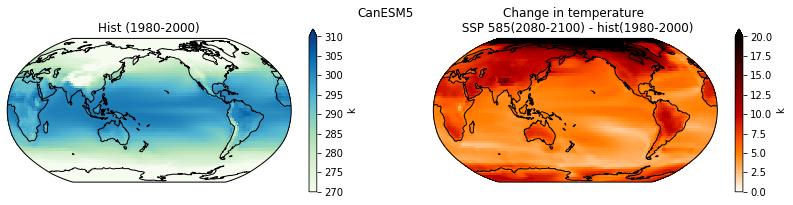

In [25]:
# specify what season to plot
#plot_season = 'DJF'
clim_range = [270, 310]  # assuming variable is tas note precip units in Kg m-1s-1
response_range = [0, 20]  # assuming variable is tas

#Note varaible here rsut(sw TOA)
for model in model_list:
    ds_hist= data[model][variable + '-clim-hist'] #.sel(season=plot_season)
    ds_ssp = data2[model][variable + '-clim-ssp385']  #.sel(season=plot_season)
   # ds_response =((ds_ssp-ds_hist)/ds_hist)*100
    ds_response =ds_ssp-ds_hist
    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=(14,3), 
                             subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180)))
    
#    plt.suptitle('%s, %s' % (model, plot_season))
    plt.suptitle('%s' % (model))
    # plot start of period in first panel

    ds_hist.plot.pcolormesh(ax=axes[0], 
                            cmap='GnBu', 
                            transform=ccrs.PlateCarree(),
                            vmin=clim_range[0], 
                            vmax=clim_range[1],
                           cbar_kwargs={'label': r'k'},extend='max')
   # plt.title('yrs %s-%s' % ('1980','2000'))
   # plt.clabel(r'$mm$ $day^{-1}$')
    axes[0].coastlines()
    axes[0].set_title('Hist (1980-2000)')
    
   # axes[0].colorbar()
    
    # plot difference between end and start of periods in second panel (confirm :difference betm aer and cntrl in panel 2??)
    ds_response.plot.pcolormesh(ax=axes[1], 
                                 cmap='gist_heat_r', 
                                transform=ccrs.PlateCarree(),
                                vmin=response_range[0], 
                                vmax=response_range[1],
                               cbar_kwargs={'label': 'k'},extend='max')

    plt.title(variable)
    #plt.clabel(r'$mm$ $day^{-1}$')
    axes[1].coastlines()
   # axes[1].set_title('Percentage increase in temperature \n SSP 585(2080-2100)')
    axes[1].set_title('Change in temperature \n SSP 585(2080-2100) - hist(1980-2000)')
    #axes[0].colorbar()
    #plt.savefig("/home/disk/p/akshu/Akshaya/Assignment4_CanESM5 precip response"+model+".png",dpi=300,bbox_inches='tight', pad_inches=0.2)  
   # plt.savefig("/home/disk/p/akshu/Akshaya/CMIP_analysis/results_DFNS/RF_aer_contrl_precip"+model+".eps",dpi=300,bbox_inches='tight', pad_inches=0.2)  

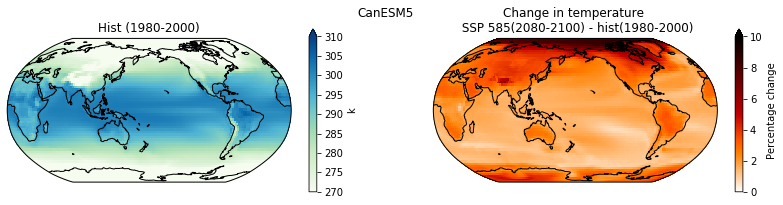

In [26]:
# specify what season to plot
#plot_season = 'DJF'
clim_range = [270, 310]  # assuming variable is tas note precip units in Kg m-1s-1
response_range = [0, 10]  # assuming variable is tas

#Note varaible here rsut(sw TOA)
for model in model_list:
    ds_hist= data[model][variable + '-clim-hist'] #.sel(season=plot_season)
    ds_ssp = data2[model][variable + '-clim-ssp385']  #.sel(season=plot_season)
    ds_response =((ds_ssp-ds_hist)/ds_hist)*100
   # ds_response =ds_ssp-ds_hist
    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=(14,3), 
                             subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180)))
    
#    plt.suptitle('%s, %s' % (model, plot_season))
    plt.suptitle('%s' % (model))
    # plot start of period in first panel

    ds_hist.plot.pcolormesh(ax=axes[0], 
                            cmap='GnBu', 
                            transform=ccrs.PlateCarree(),
                            vmin=clim_range[0], 
                            vmax=clim_range[1],
                           cbar_kwargs={'label': r'k'},extend='max')
   # plt.title('yrs %s-%s' % ('1980','2000'))
   # plt.clabel(r'$mm$ $day^{-1}$')
    axes[0].coastlines()
    axes[0].set_title('Hist (1980-2000)')
    
   # axes[0].colorbar()
    
    # plot difference between end and start of periods in second panel (confirm :difference betm aer and cntrl in panel 2??)
    ds_response.plot.pcolormesh(ax=axes[1], 
                                 cmap='gist_heat_r', 
                                transform=ccrs.PlateCarree(),
                                vmin=response_range[0], 
                                vmax=response_range[1],
                               cbar_kwargs={'label': 'Percentage change'},extend='max')

    plt.title(variable)
    #plt.clabel(r'$mm$ $day^{-1}$')
    axes[1].coastlines()
   # axes[1].set_title('Percentage increase in temperature \n SSP 585(2080-2100)')
    axes[1].set_title('Change in temperature \n SSP 585(2080-2100) - hist(1980-2000)')
    #axes[0].colorbar()
    #plt.savefig("/home/disk/p/akshu/Akshaya/Assignment4_CanESM5 precip response"+model+".png",dpi=300,bbox_inches='tight', pad_inches=0.2)  
   # plt.savefig("/home/disk/p/akshu/Akshaya/CMIP_analysis/results_DFNS/RF_aer_contrl_precip"+model+".eps",dpi=300,bbox_inches='tight', pad_inches=0.2)  

In [27]:
#iyear =150
# compute annual means and then plot
#plt.figure(figsize=(10,11))
plt.figure()
for model in model_list:
    # compute annual averages, so first resample to annual values and then take the mean!!!
    gm_data_annualhist = data[model][variable + '-gm'].resample(time='1Y').mean()
    gm_data_annualhist = gm_data_annualhist.values # retrieve numpy array for plotting
    gm_data_annual2ssp = data2[model][variable + '-gm'].resample(time='1Y').mean()
    gm_data_annual2ssp = gm_data_annual2ssp.values # retrieve numpy array for plotting
    nh_data_annualhist = data[model][variable + '-nh'].resample(time='1Y').mean()
    nh_data_annualhist = nh_data_annualhist.values # retrieve numpy array for plotting
    nh_data_annual2ssp = data2[model][variable + '-nh'].resample(time='1Y').mean()
    nh_data_annual2ssp = nh_data_annual2ssp.values # retrieve numpy array for plotting
    
    sh_data_annualhist = data[model][variable + '-sh'].resample(time='1Y').mean()
    sh_data_annualhist = sh_data_annualhist.values # retrieve numpy array for plotting
    sh_data_annual2ssp = data2[model][variable + '-sh'].resample(time='1Y').mean()
    sh_data_annual2ssp = sh_data_annual2ssp.values # retrieve numpy array for plotting
   
    
    

<Figure size 432x288 with 0 Axes>

In [28]:
 #len(gm_data_annual)

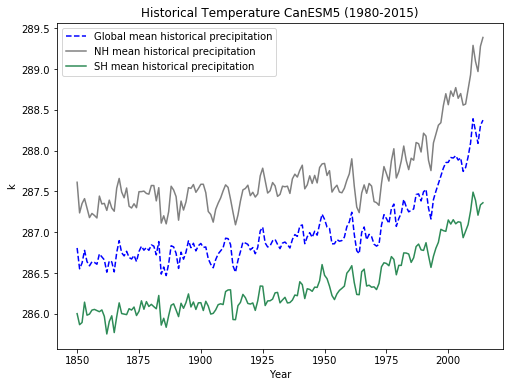

In [29]:
histyrs=np.arange(1850,2015,1)
plt.figure(figsize=(8,6))
plt.plot(histyrs,gm_data_annualhist,color='b',linestyle='--',label='Global mean historical precipitation')
plt.plot(histyrs,nh_data_annualhist,color='grey',label='NH mean historical precipitation')
plt.plot(histyrs,sh_data_annualhist,color='seagreen',label='SH mean historical precipitation')
#plt.ylim(2.6,3)
plt.xlabel('Year')
plt.ylabel(r'k')
plt.title('Historical Temperature CanESM5 (1980-2015)')
plt.legend()

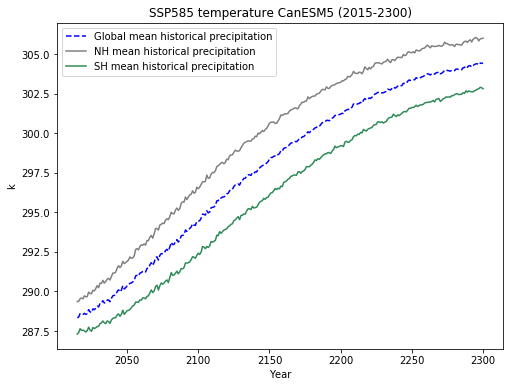

In [30]:
sspyrs=np.arange(2015,2301,1)
plt.figure(figsize=(8,6))
plt.plot(sspyrs,gm_data_annual2ssp,color='b',linestyle='--',label='Global mean historical precipitation')
plt.plot(sspyrs,nh_data_annual2ssp,color='grey',label='NH mean historical precipitation')
plt.plot(sspyrs,sh_data_annual2ssp,color='seagreen',label='SH mean historical precipitation')
plt.xlabel('Year')
plt.ylabel(r'k')
plt.title('SSP585 temperature CanESM5 (2015-2300)')
plt.legend()

In [31]:
#np.save("/home/disk/p/akshu/Akshaya/DF_class_RF_assignment/variables/data_cancesmhist_T_amonhist.npy", ds_hist)
#np.save("/home/disk/p/akshu/Akshaya/DF_class_RF_assignment/variables/data_cancesmhist_T__amonssp585.npy", ds_ssp)

In [32]:
np.save("/home/disk/p/akshu/Akshaya/DF_class_RF_assignment/variables/data_cancesmhist_T_amonhist.npy", data)
np.save("/home/disk/p/akshu/Akshaya/DF_class_RF_assignment/variables/data_cancesmhist_T__amonssp585.npy", data2)